In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('MSFT', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.990000,30.480000,30.980000,30.480000,31929700.0,23.438797
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.800230
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.807917
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.661804
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.415726


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,153.758942
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,155.019272
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,155.302612
2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,153.964111
2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,154.071564


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.990000,30.480000,30.980000,30.480000,31929700.0,23.438797
1,2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.800230
2,2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.807917
3,2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.661804
4,2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.415726


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,30.990000,30.480000,30.980000,30.480000,31929700.0
1,31.100000,30.590000,30.620001,30.950001,38409100.0
2,31.100000,30.639999,30.850000,30.959999,49749600.0
3,31.080000,30.520000,30.879999,30.770000,58182400.0
4,30.700001,30.190001,30.629999,30.450001,50559700.0


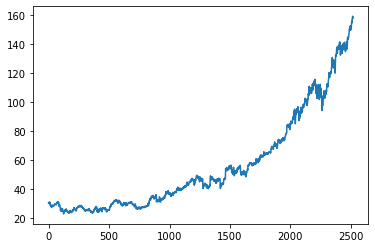

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,30.990000,30.480000,30.980000,30.480000,31929700.0
1,31.100000,30.590000,30.620001,30.950001,38409100.0
2,31.100000,30.639999,30.850000,30.959999,49749600.0
3,31.080000,30.520000,30.879999,30.770000,58182400.0
4,30.700001,30.190001,30.629999,30.450001,50559700.0
...,...,...,...,...,...
2512,157.710007,157.119995,157.479996,157.380005,8989200.0
2513,158.729996,157.399994,157.559998,158.669998,14520600.0
2514,159.550003,158.220001,159.449997,158.960007,18412800.0
2515,159.020004,156.729996,158.990005,157.589996,16348400.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    142.5666
2513    142.8312
2514    143.0739
2515    143.2970
2516    143.4851
Name: Close, Length: 2517, dtype: float64

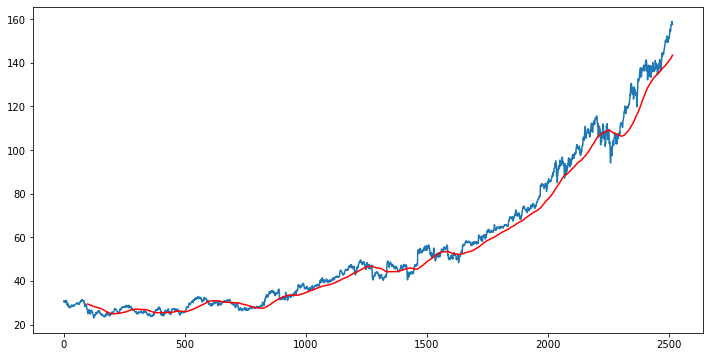

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    135.45145
2513    135.67230
2514    135.89415
2515    136.10255
2516    136.30320
Name: Close, Length: 2517, dtype: float64

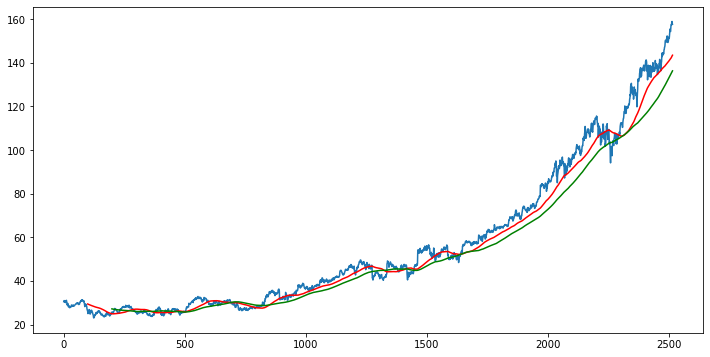

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2517, 5)

In [13]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.18394483],
       [0.19551836],
       [0.19576457],
       ...,
       [0.99064277],
       [0.99162767],
       [0.98448665]])

In [16]:
data_training_array.shape

(1761, 1)

In [17]:
x_train = [] #Step
y_train = [] #Predect

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(1661, 100, 1)

In [19]:
#ML Model

In [20]:
from tensorflow.keras.layers import  Dense, Dropout, LSTM

from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()


model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 10s 141ms/step - loss: 0.0475
Epoch 2/50
52/52 [==============================] - 7s 139ms/step - loss: 0.0088
Epoch 3/50
52/52 [==============================] - 7s 140ms/step - loss: 0.0087
Epoch 4/50
52/52 [==============================] - 7s 139ms/step - loss: 0.0082
Epoch 5/50
52/52 [==============================] - 7s 140ms/step - loss: 0.0078
Epoch 6/50
52/52 [==============================] - 7s 139ms/step - loss: 0.0063
Epoch 7/50
52/52 [==============================] - 7s 141ms/step - loss: 0.0074
Epoch 8/50
52/52 [==============================] - 7s 139ms/step - loss: 0.0059
Epoch 9/50
52/52 [==============================] - 7s 140ms/step - loss: 0.0055
Epoch 10/50
52/52 [==============================] - 7s 141ms/step - loss: 0.0050
Epoch 11/50
52/52 [==============================] - 7s 141ms/step - loss: 0.0058
Epoch 12/50
52/52 [==============================] - 7s 142ms/step - loss: 0.0060
Epoch 13/50
52/52 [=====

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
1761,62.900002
1762,62.139999
1763,62.580002
1764,62.299999
1765,62.299999


In [26]:
data_training.tail(100)

,Close
1661,58.060001
1662,58.200001
1663,58.020000
1664,58.299999
1665,57.939999
...,...
1756,63.540001
1757,63.549999
1758,63.240002
1759,63.279999


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [29]:
final_df.head()

,Close
0,58.060001
1,58.200001
2,58.020000
3,58.299999
4,57.939999


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.80048871e-02],
       [1.93674115e-02],
       [1.76155838e-02],
       [2.03406326e-02],
       [1.68369773e-02],
       [1.85888049e-02],
       [1.19707976e-02],
       [1.31387074e-02],
       [1.35279736e-02],
       [1.37226252e-02],
       [1.42092358e-02],
       [1.63503667e-02],
       [1.69343216e-02],
       [1.90754155e-02],
       [1.77128911e-02],
       [1.83941533e-02],
       [1.63503667e-02],
       [1.21654492e-02],
       [1.34306663e-02],
       [1.42092358e-02],
       [1.36253180e-02],
       [1.41119285e-02],
       [1.18734903e-02],
       [0.00000000e+00],
       [8.17518336e-03],
       [3.11435203e-03],
       [4.86610544e-04],
       [9.53770773e-03],
       [1.01216627e-02],
       [7.00731063e-03],
       [5.83943790e-03],
       [1.50851496e-02],
       [1.56691045e-02],
       [1.18734903e-02],
       [6.71535173e-03],
       [1.69343216e-02],
       [1.77128911e-02],
       [1.15815314e-02],
       [1.35279736e-02],
       [1.17761459e-02],


In [31]:
input_data.shape

(856, 1)

In [32]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [35]:
##Making Prediction

y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 34ms/step


In [36]:
y_predicted.shape

(756, 1)

In [37]:
y_test

array([0.06510951, 0.05771289, 0.06199516, 0.05927007, 0.05927007,
       0.06452555, 0.06257907, 0.06238442, 0.06793186, 0.06228711,
       0.06316303, 0.06150851, 0.06121655, 0.05927007, 0.06355233,
       0.06569343, 0.07114356, 0.07270074, 0.07844279, 0.09313868,
       0.08681263, 0.08214114, 0.07172752, 0.06773721, 0.07270074,
       0.07231143, 0.07026765, 0.06939173, 0.07639901, 0.07581509,
       0.0828224 , 0.08136253, 0.08097323, 0.08087588, 0.08184918,
       0.08058392, 0.07931874, 0.08184918, 0.08184918, 0.07805356,
       0.07562044, 0.08496353, 0.07591243, 0.07824818, 0.07844279,
       0.07970805, 0.0854501 , 0.08291974, 0.08486619, 0.08272505,
       0.07980539, 0.08311436, 0.08204379, 0.08428227, 0.08486619,
       0.07785887, 0.08583941, 0.08428227, 0.08535283, 0.08652067,
       0.08836984, 0.09012167, 0.09245741, 0.09391728, 0.09090028,
       0.0926521 , 0.09099755, 0.0926521 , 0.09216546, 0.09070559,
       0.09021901, 0.08778592, 0.0850608 , 0.09021901, 0.08934

In [38]:
y_predicted

array([[0.10834056],
       [0.10796186],
       [0.10695633],
       [0.10548419],
       [0.10374576],
       [0.10196386],
       [0.100447  ],
       [0.09935051],
       [0.09869495],
       [0.09853314],
       [0.09872326],
       [0.09910139],
       [0.09950076],
       [0.09980689],
       [0.09993467],
       [0.09996079],
       [0.10003243],
       [0.10036173],
       [0.10107827],
       [0.10229206],
       [0.10429639],
       [0.10700998],
       [0.1100288 ],
       [0.11266862],
       [0.11429526],
       [0.11473083],
       [0.11411242],
       [0.11271004],
       [0.11086591],
       [0.10907641],
       [0.10767972],
       [0.10697585],
       [0.10701269],
       [0.10764995],
       [0.10866079],
       [0.1098249 ],
       [0.11094505],
       [0.11185366],
       [0.11252317],
       [0.11298572],
       [0.11319995],
       [0.11309302],
       [0.11288019],
       [0.11255386],
       [0.11214234],
       [0.11169308],
       [0.11128488],
       [0.111

In [39]:
scaler.scale_

array([0.00973236])

In [40]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

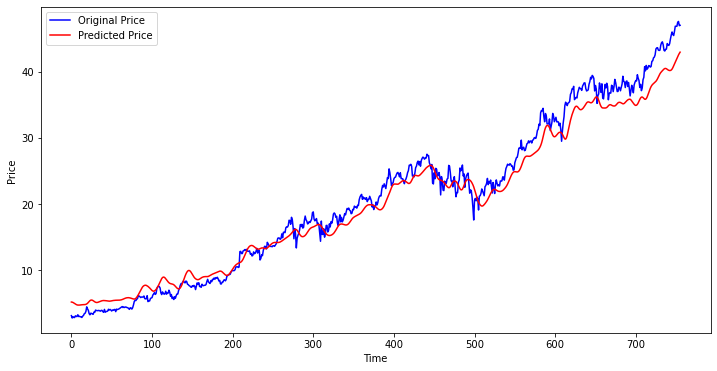

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()